# Advanced scikit-learn

## Agenda

- StandardScaler
- Pipeline

## StandardScaler

### What is the problem we're trying to solve?

In [1]:
# fake data
import pandas as pd
train = pd.DataFrame({'id':[0,1,2], 'length':[0.9,0.3,0.6], 'mass':[0.1,0.2,0.8], 'rings':[40,50,60]})
test = pd.DataFrame({'length':[0.59], 'mass':[0.79], 'rings':[54]})

In [2]:
# training data
train

id  length  mass  rings
0   0     0.9   0.1     40
1   1     0.3   0.2     50
2   2     0.6   0.8     60

In [3]:
# testing data
test

length  mass  rings
0    0.59  0.79     54

In [4]:
# define X and y
feature_cols = ['length', 'mass', 'rings']
X = train[feature_cols]
y = train.id

In [5]:
# KNN with K=1
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=1, p=2, weights='uniform')

In [6]:
# what "should" it predict?
knn.predict(test)

array([1])

In [7]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (5, 5)

In [8]:
# create a "colors" array for plotting
import numpy as np
colors = np.array(['red', 'green', 'blue'])

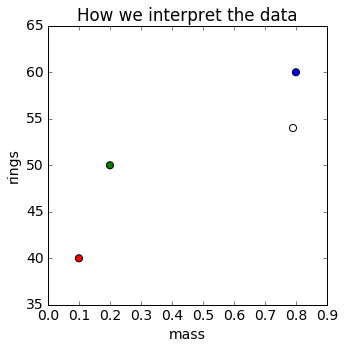

In [9]:
# scatter plot of training data, colored by id (0=red, 1=green, 2=blue)
plt.scatter(train.mass, train.rings, c=colors[train.id], s=50)

# testing data
plt.scatter(test.mass, test.rings, c='white', s=50)

# add labels
plt.xlabel('mass')
plt.ylabel('rings')
plt.title('How we interpret the data')

(0, 30)

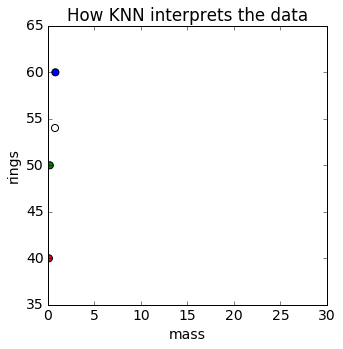

In [10]:
# adjust the x-limits
plt.scatter(train.mass, train.rings, c=colors[train.id], s=50)
plt.scatter(test.mass, test.rings, c='white', s=50)
plt.xlabel('mass')
plt.ylabel('rings')
plt.title('How KNN interprets the data')
plt.xlim(0, 30)

### How does StandardScaler solve the problem?

[StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) is used for the "standardization" of features, also known as "center and scale" or "z-score normalization".

In [17]:
# standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [18]:
# original values
X.values

array([[  5.64000000e+00,   1.06500000e+03],
       [  4.38000000e+00,   1.05000000e+03],
       [  5.68000000e+00,   1.18500000e+03],
       [  7.80000000e+00,   1.48000000e+03],
       [  4.32000000e+00,   7.35000000e+02],
       [  6.75000000e+00,   1.45000000e+03],
       [  5.25000000e+00,   1.29000000e+03],
       [  5.05000000e+00,   1.29500000e+03],
       [  5.20000000e+00,   1.04500000e+03],
       [  7.22000000e+00,   1.04500000e+03],
       [  5.75000000e+00,   1.51000000e+03],
       [  5.00000000e+00,   1.28000000e+03],
       [  5.60000000e+00,   1.32000000e+03],
       [  5.40000000e+00,   1.15000000e+03],
       [  7.50000000e+00,   1.54700000e+03],
       [  7.30000000e+00,   1.31000000e+03],
       [  6.20000000e+00,   1.28000000e+03],
       [  6.60000000e+00,   1.13000000e+03],
       [  8.70000000e+00,   1.68000000e+03],
       [  5.10000000e+00,   8.45000000e+02],
       [  5.65000000e+00,   7.80000000e+02],
       [  4.50000000e+00,   7.70000000e+02],
       [  

In [19]:
# standardized values
X_scaled

array([[ 0.25171685,  1.01300893],
       [-0.29332133,  0.96524152],
       [ 0.26901965,  1.39514818],
       [ 1.18606801,  2.33457383],
       [-0.31927553, -0.03787401],
       [ 0.73186953,  2.23903902],
       [ 0.08301456,  1.72952002],
       [-0.00349944,  1.74544249],
       [ 0.06138606,  0.94931905],
       [ 0.93517742,  0.94931905],
       [ 0.29929955,  2.43010864],
       [-0.02512794,  1.69767508],
       [ 0.23441405,  1.82505483],
       [ 0.14790005,  1.28369089],
       [ 1.05629702,  2.54793491],
       [ 0.96978302,  1.79320989],
       [ 0.49395604,  1.69767508],
       [ 0.66698403,  1.22000102],
       [ 1.575381  ,  2.97147258],
       [ 0.01812906,  0.3124203 ],
       [ 0.25604255,  0.10542821],
       [-0.24141293,  0.07358327],
       [-0.54421192,  0.91747411],
       [-0.48797782,  0.85378424],
       [-0.66533151,  0.3124203 ],
       [-0.63937732,  0.2646529 ],
       [-0.11164194,  1.42699311],
       [-0.47932642,  1.71359755],
       [-0.24141293,

In [20]:
# figure out how it standardized
print scaler.mean_
print scaler.std_

[   5.05808988  746.89325843]
[   2.31176466  314.02165684]


In [21]:
# manually standardize
(X.values - scaler.mean_) / scaler.std_

array([[ 0.25171685,  1.01300893],
       [-0.29332133,  0.96524152],
       [ 0.26901965,  1.39514818],
       [ 1.18606801,  2.33457383],
       [-0.31927553, -0.03787401],
       [ 0.73186953,  2.23903902],
       [ 0.08301456,  1.72952002],
       [-0.00349944,  1.74544249],
       [ 0.06138606,  0.94931905],
       [ 0.93517742,  0.94931905],
       [ 0.29929955,  2.43010864],
       [-0.02512794,  1.69767508],
       [ 0.23441405,  1.82505483],
       [ 0.14790005,  1.28369089],
       [ 1.05629702,  2.54793491],
       [ 0.96978302,  1.79320989],
       [ 0.49395604,  1.69767508],
       [ 0.66698403,  1.22000102],
       [ 1.575381  ,  2.97147258],
       [ 0.01812906,  0.3124203 ],
       [ 0.25604255,  0.10542821],
       [-0.24141293,  0.07358327],
       [-0.54421192,  0.91747411],
       [-0.48797782,  0.85378424],
       [-0.66533151,  0.3124203 ],
       [-0.63937732,  0.2646529 ],
       [-0.11164194,  1.42699311],
       [-0.47932642,  1.71359755],
       [-0.24141293,

### Exercise: Applying StandardScaler to a real dataset

- Wine dataset from the UCI Machine Learning Repository: [data](http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data), [data dictionary](http://archive.ics.uci.edu/ml/datasets/Wine)
- **Goal:** Predict the origin of wine using chemical analysis

In [22]:
# read three columns from the dataset into a DataFrame
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
col_names = ['label', 'color', 'proline']
wine = pd.read_csv(url, header=None, names=col_names, usecols=[0, 10, 13])

In [23]:
# look at a few rows of this DataFrame
wine.head(3)

label  color  proline
0      1   5.64     1065
1      1   4.38     1050
2      1   5.68     1185

In [24]:
# use .describe() to check out the mean and variance (and other stats) of each column
wine.describe()

label       color      proline
count  178.000000  178.000000   178.000000
mean     1.938202    5.058090   746.893258
std      0.775035    2.318286   314.907474
min      1.000000    1.280000   278.000000
25%      1.000000    3.220000   500.500000
50%      2.000000    4.690000   673.500000
75%      3.000000    6.200000   985.000000
max      3.000000   13.000000  1680.000000

In [25]:
# define X and y
feature_cols = ['color', 'proline']
X = wine[feature_cols]
y = wine.label

In [26]:
# split into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [27]:
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape
# fit a StanardScaler object to the X_train data
# create a new DF called X_train_scaled, which is the scaled version of the original data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns = feature_cols)

(133, 2) (133,)
(45, 2) (45,)


In [28]:
# check that it standardized properly, examine the mean() and std() of the columns of X_train_scaled
X_train_scaled_df.describe()


color       proline
count  1.330000e+02  1.330000e+02
mean  -3.785610e-16  1.702898e-16
std    1.003781e+00  1.003781e+00
min   -1.574511e+00 -1.539270e+00
25%   -8.332440e-01 -7.973283e-01
50%   -1.841122e-01 -2.243108e-01
75%    4.022003e-01  6.434959e-01
max    3.333763e+00  3.104490e+00

In [29]:
# now create a scaled version of the test data
scaler.fit(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
# check the mean() and std() of these columns. Seem different?
print X_test_scaled.mean(), X_test_scaled.std()
# Verifies that X_train did not leak into X_test data

0.0426215958696 1.01812505041


In [31]:
# KNN accuracy on original data
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)
from sklearn import metrics
print metrics.accuracy_score(y_test, y_pred_class)

0.644444444444


In [52]:
# KNN accuracy on scaled data
# In Regression Beta weights for features is relative to the scale, if you standardize
# feature then you can compare beta weights to determine which variables are more highly correlated
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)
y_pred_class = knn.predict(X_test_scaled)
from sklearn import metrics
print metrics.accuracy_score(y_test, y_pred_class)

0.866666666667


In [53]:
# For Naive Bayes, don't do feature scaling because want counts in the DTM

## Pipeline 
### What is the problem we're trying to solve?

In [15]:
# define X and y
feature_cols = ['color', 'proline']
X = wine[feature_cols]
y = wine.label

In [18]:
# proper cross-validation on the original (unscaled) data
knn = KNeighborsClassifier(n_neighbors=3)
from sklearn.cross_validation import cross_val_score
# This has 5-folds and does it for you
cross_val_score(knn, X, y, cv=5, scoring='accuracy').mean()

0.71983168041991563

In [21]:
# why is this improper cross-validation on the scaled data?
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Train data is leaking into the Test data since scaler is seeing all test data
cross_val_score(knn, X_scaled, y, cv=5, scoring='accuracy').mean()

0.90104247104247115

### How does Pipeline solve the problem?

[Pipeline](http://scikit-learn.org/stable/modules/pipeline.html) is used for chaining steps together:

In [22]:
# fix the cross-validation process using Pipeline
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=3))
cross_val_score(pipe, X, y, cv=5, scoring='accuracy').mean()

0.89516011810129448

Pipeline can also be used with [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) for parameter searching:

In [23]:
# search for an optimal n_neighbors value using GridSearchCV
neighbors_range = range(1, 21)
param_grid = dict(kneighborsclassifier__n_neighbors=neighbors_range)
from sklearn.grid_search import GridSearchCV
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')
grid.fit(X, y)
print grid.best_score_
print grid.best_params_

0.910112359551
{'kneighborsclassifier__n_neighbors': 1}
